<a href="https://colab.research.google.com/github/adithya1010/Naan-Mudhalvan-Labs/blob/main/Mini-Project-1/MiniProject_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mini Project - COVID data

Project done with inputs from GPT 4o Mini

Special Thanks to Muthu Meena for her code too. Cleared many doubts🙏

Link to Chat: https://getmerlin.in/share/chat/k3nZ__MKGAm

**References:**

1. https://medium.com/@malli.learnings/exploring-machine-learning-models-a-comprehensive-comparison-of-logistic-regression-decision-38cc12287055
2. https://www.ijraset.com/research-paper/comparative-analysis-of-machine-learning-algorithms
3. https://www.sciencedirect.com/science/article/pii/S1877050922021159
4. https://github.com/ekombu/Comparison-of-classification-Algorithms-using-Iris-dataset
5. https://github.com/alicevillar/titanic-kaggle
6. https://medium.com/@balaswitha.reddy/battle-of-the-algorithms-comparing-decision-trees-svm-random-forests-and-logistic-regression-1bf3809c8df3
7. https://www.researchgate.net/publication/383112660_Survival_Prediction_and_Comparison_of_the_Titanic_based_on_Machine_Learning_Classifiers
8. https://github.com/adithya1010/Naan-Mudhalvan-Labs/tree/main/Task-3
9. https://colab.research.google.com/drive/1vizliO1MueA5rXjzpt8i08bb_VehL-ox?usp=sharing

The PPT prepared for this project can be found here:
https://gamma.app/docs/Mini-Project-COVID-data-analysis-bmnj4yqhkwqrtak



### Loading the dataset

In [ ]:
import numpy as np
import pandas as pd

import pickle as pkl

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [ ]:
covid_data = pd.read_csv('/content/ASPR_Treatments_Locator_20250124.csv')
covid_data.head()

<ipython-input-177-4be3cf37aaa5>:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_data = pd.read_csv('/content/ASPR_Treatments_Locator_20250124.csv')


,Provider Name,Address 1,Address 2,City,State,Zip,Public Phone,Latitude,Longitude,Geopoint,...,Has Veklury,Has Oseltamivir Generic,Has Oseltamivir Suspension,Has Oseltamivir Tamiflu,Has Baloxavir,Has Zanamivir,Has Peramivir,Grantee Code,Is Flu,Is COVID-19
0,CVS PHARMACY #05246,110 HWY 98,NaN,PORT SAINT JOE,FL,32456,NaN,30.016430,-85.430510,POINT (-85.43051 30.01643),...,False,False,False,False,False,False,False,CV1,False,True
1,PUBLIX PHARMACY #0567,2517 SOUTH FEDERAL HIGHWAY,NaN,FT PIERCE,FL,34982,NaN,27.319630,-80.316317,POINT (-80.316317 27.31963),...,False,False,False,False,False,False,False,PX1,False,True
2,WALGREENS #4379,4320 26TH ST W,NaN,BRADENTON,FL,34205-3563,941-755-8596,27.462954,-82.588373,POINT (-82.588373 27.462954),...,False,True,False,False,False,False,False,WG1,True,True
3,PUBLIX PHARMACY #0894,6820 OKEECHOBEE BLVD,NaN,WEST PALM BEACH,FL,33411,NaN,26.705894,-80.150789,POINT (-80.150789 26.705894),...,False,False,False,False,False,False,False,PX1,False,True
4,PUBLIX PHARMACY #0019,731 DUVAL STATION RD SUITE 4,NaN,JACKSONVILLE,FL,32218,NaN,30.485316,-81.604614,POINT (-81.604614 30.485316),...,False,False,False,False,False,False,False,PX1,False,True


### Data Exploration and Analysis

In [ ]:
covid_data.shape

(65848, 34)

In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65848 entries, 0 to 65847
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Provider Name                   65848 non-null  object 
 1   Address 1                       65847 non-null  object 
 2   Address 2                       7373 non-null   object 
 3   City                            65847 non-null  object 
 4   State                           65847 non-null  object 
 5   Zip                             65847 non-null  object 
 6   Public Phone                    20559 non-null  object 
 7   Latitude                        65848 non-null  float64
 8   Longitude                       65848 non-null  float64
 9   Geopoint                        65848 non-null  object 
 10  Last Report Date                65847 non-null  object 
 11  Is PAP Site                     65848 non-null  bool   
 12  Prescribing Services Available  

In [ ]:
covid_data.dtypes

,0
Provider Name,object
Address 1,object
Address 2,object
City,object
State,object
Zip,object
Public Phone,object
Latitude,float64
Longitude,float64
Geopoint,object


In [ ]:
covid_data.isna().sum()

,0
Provider Name,0
Address 1,1
Address 2,58475
City,1
State,1
Zip,1
Public Phone,45289
Latitude,0
Longitude,0
Geopoint,0


In [ ]:
covid_data.describe()

,Latitude,Longitude
count,65848.000000,65848.000000
mean,36.997081,-89.941546
std,5.600009,16.009970
min,13.475204,-159.672639
25%,33.636309,-96.803057
50%,37.997045,-85.331567
75%,40.868882,-78.844330
max,71.297375,145.728316


In [ ]:
covid_data.isna().any(axis=1).sum()


65374

### Defining Features and Target

In [ ]:
features=["Provider Name","Address 1","City","State","Zip",
            "Public Phone", "Last Report Date", "Is Flu",
            "Has Paxlovid", "Has Lagevrio", "Has Veklury",
            "Has Oseltamivir Generic", "Has Oseltamivir Suspension", "Has Oseltamivir Tamiflu",
            "Has Baloxavir", "Has Zanamivir", "Has Peramivir"]
target_col="Is COVID-19"
unwanted_col=["Latitude", "Longitude","Geopoint","Address 2" ,"Prescribing Services Available", "Appointment URL","Grantee Code"]

In [ ]:
covid_data=covid_data.drop(columns='unwanted_cols',errors='ignore')

In [ ]:
covid_data=covid_data.sample(n=10000, random_state=42, replace=False)
print(covid_data)



                       Provider Name                   Address 1  Address 2  \
31438           STOP & SHOP PHARMACY               1185 BROAD ST        NaN   
23189          PUBLIX PHARMACY #0646           7525 ROSWELL ROAD        NaN   
501                BAYSHORE PHARMACY           6229 14TH ST WEST        NaN   
21929                 GIANT PHARMACY         200 DOVE RUN CENTER        NaN   
11607       WALMART PHARMACY 10-1628  5500 MILAN ROAD, SUITE 200        NaN   
...                              ...                         ...        ...   
32240  ONPOINT PHARMACY OF SMITHTOWN       260 MIDDLE COUNTRY RD  SUITE 105   
60828         THOMAS FAMILY PHARMACY       4605 MACCORKLE AVE SW        NaN   
55708            CVS PHARMACY #02405               955 N 21ST ST        NaN   
2601                WALGREENS #09515   1301 AVENUE OF THE CITIES        NaN   
13813   HAWTHORNE WINNSBORO PHARMACY      110 S. CONGRESS STREET        NaN   

                   City State         Zip  Public P

In [ ]:
X=covid_data[features]
y=covid_data[target_col]

In [ ]:
# Encode target variable if categorical
if covid_data[target_col].dtype == 'object':
    y = LabelEncoder().fit_transform(y)

### Splitting data into training and test sets

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Performing Linear Regression

In [ ]:
# Create a ColumnTransformer to handle categorical and numerical features
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(exclude=['object']).columns

In [ ]:
#preprocessing
from sklearn.impute import SimpleImputer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),  # Handle numerical features
        ('cat', OneHotEncoder(sparse_output=True, handle_unknown='ignore', max_categories=10), categorical_cols)
])

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# Create a pipeline that first preprocesses the data and then fits the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [ ]:
# 1. Linear Regression (for continuous target)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print("Linear Regression Accuracy:",round(lin_reg.score(X_test, y_test), 4))
print("Linear Regression MSE:", round(mean_squared_error(y_test, y_pred), 4))

Linear Regression Accuracy: 0.2526
Linear Regression MSE: 0.0081


### Evaluating the Model

In [ ]:
from sklearn.metrics import r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
r2 = r2_score(y_test, y_pred) # Calculate R-squared
print(f"R-squared: {r2}")

Mean Squared Error: 0.008131473402161261
Root Mean Squared Error: 0.09017468271173046
R-squared: 0.2525532307968327


### Performing Support Vector Machine

### Scaling numerical features

In [ ]:
# 2. Logistic Regression (for classification)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", (accuracy_score(y_test, y_pred_log)))
print("Logistic Regression MSE:", round(mean_squared_error(y_test, y_pred_log), 4))

Logistic Regression Accuracy: 1.0
Logistic Regression MSE: 0.0


In [ ]:
# 3. Support Vector Machine (SVM)
svm = SVC(C=0.01, kernel='poly', degree=2, gamma=10)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", round(accuracy_score(y_test, y_pred_svm), 4))
print("SVM MSE:", round(mean_squared_error(y_test, y_pred_svm), 4))

SVM Accuracy: 0.998
SVM MSE: 0.002


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# 4. Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_dt), 4))
print("Decision Tree MSE:", round(mean_squared_error(y_test, y_pred_dt), 4))

Decision Tree Accuracy: 1.0
Decision Tree MSE: 0.0


In [ ]:
# 5. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1000, max_depth=2, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", (accuracy_score(y_test, y_pred_rf)))
print("Random Forest MSE:", round(mean_squared_error(y_test, y_pred_rf), 4))

Random Forest Accuracy: 0.989
Random Forest MSE: 0.011


In [ ]:

# Initialize lists to store results
models = ['Linear Regression', 'Logistic Regression', 'SVM','Random Forest','Decision Tree']
accuracy = []
mse = []


In [ ]:
# 1. Linear Regression (for continuous target)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
accuracy.append(lin_reg.score(X_test, y_test))
mse.append(mean_squared_error(y_test, y_pred))

In [ ]:
# 2. Logistic Regression (for classification)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
accuracy.append(accuracy_score(y_test, y_pred_log))
mse.append(mean_squared_error(y_test, y_pred_log))

In [ ]:
# 3. Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy.append(accuracy_score(y_test, y_pred_svm))
mse.append(mean_squared_error(y_test, y_pred_svm))

In [ ]:
# 4. Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy.append(accuracy_score(y_test, y_pred_dt))
mse.append(mean_squared_error(y_test, y_pred_dt))

In [ ]:

# 5. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy.append(accuracy_score(y_test, y_pred_rf))
mse.append(mean_squared_error(y_test, y_pred_rf))

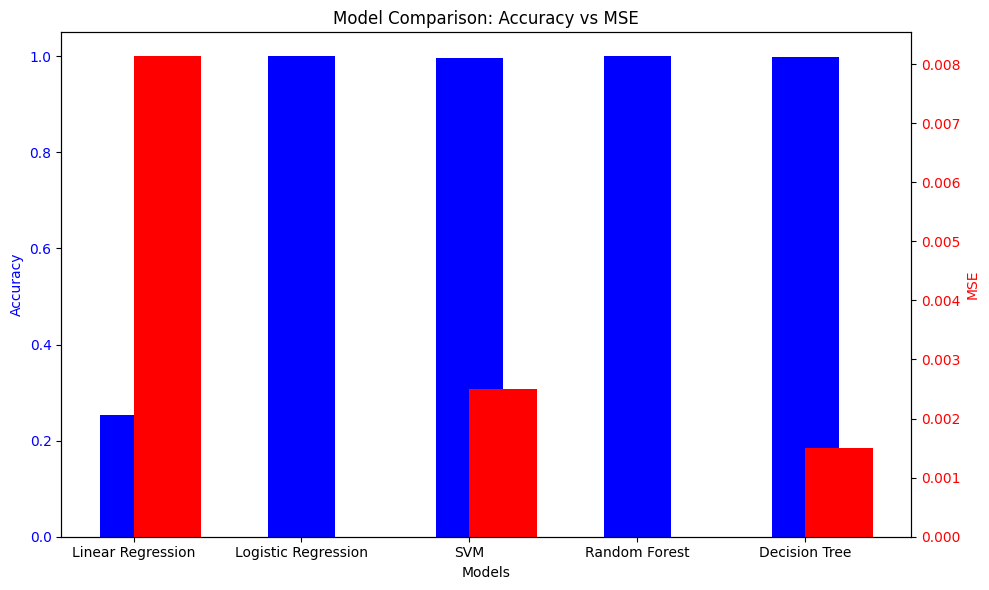

In [ ]:
# Create a figure and axes for the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create bar plots for accuracy
ax1.bar(models, accuracy, color='b', width=0.4, label='Accuracy', align='center')
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params(axis='y', labelcolor='b')


# Create a second y-axis for MSE
ax2 = ax1.twinx()
ax2.bar(models, mse, color='r', width=0.4, label='MSE', align='edge')
ax2.set_ylabel('MSE', color='r')
ax2.tick_params(axis='y', labelcolor='r')


# Add title and show plot
plt.title('Model Comparison: Accuracy vs MSE')
fig.tight_layout()
plt.show()